In [7]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
restoration_areas = gpd.read_file("/Users/lijinpeng/Desktop/MDoyster/data/Restoration/Maryland_Shellfish_-_Historic_Oyster_Plantings.geojson")
geojson_folder = "/Users/lijinpeng/Desktop/MDoyster/data/Climate/geojson_output"

seasons = ["Winter", "Spring", "Summer", "Fall"]

In [3]:
# 创建一个 DataFrame 统计结果
results = []

for season in seasons:
    # 读取异常值 GeoJSON 文件
    anomaly_file = f"{geojson_folder}/{season}_anomalies.geojson"
    anomalies = gpd.read_file(anomaly_file)

    # 转换为 GeoDataFrame
    anomalies_gdf = gpd.GeoDataFrame(
        anomalies,
        geometry=gpd.points_from_xy(anomalies["geometry"].x, anomalies["geometry"].y),
        crs="EPSG:4326"
    )

    # 过滤异常值：保留 anomaly 值在 [-2, 2] 之外的点
    anomalies_filtered = anomalies_gdf[(anomalies_gdf["anomaly"] < -2) | (anomalies_gdf["anomaly"] > 2)]

    # 检查哪些 restoration_areas 落在这些异常值点范围内
    restoration_intersects = restoration_areas[restoration_areas.intersects(anomalies_filtered.unary_union)]

    # 统计落在异常值范围内的 restoration 区域数量
    count = len(restoration_intersects)
    results.append({"Season": season, "Restoration Areas Outside [-2, 2]": count})

# 输出统计结果
results_df = pd.DataFrame(results)
print(results_df)


/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/107875372.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  restoration_intersects = restoration_areas[restoration_areas.intersects(anomalies_filtered.unary_union)]
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/107875372.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  restoration_intersects = restoration_areas[restoration_areas.intersects(anomalies_filtered.unary_union)]
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/107875372.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  restoration_intersects = restoration_areas[restoration_areas.intersects(anomalies_filtered.unary_union)]
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/107875372.py:20: DeprecationWarning: The 'unary_union' attribute 

   Season  Restoration Areas Outside [-2, 2]
0  Winter                                 71
1  Spring                                  2
2  Summer                                  0
3    Fall                                  9


/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/2916849633.py:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  restoration_areas.intersects(winter_anomalies_filtered.unary_union)
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/2916849633.py:48: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", fontsize=10)
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_64827/2916849633.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left", fontsize=10)


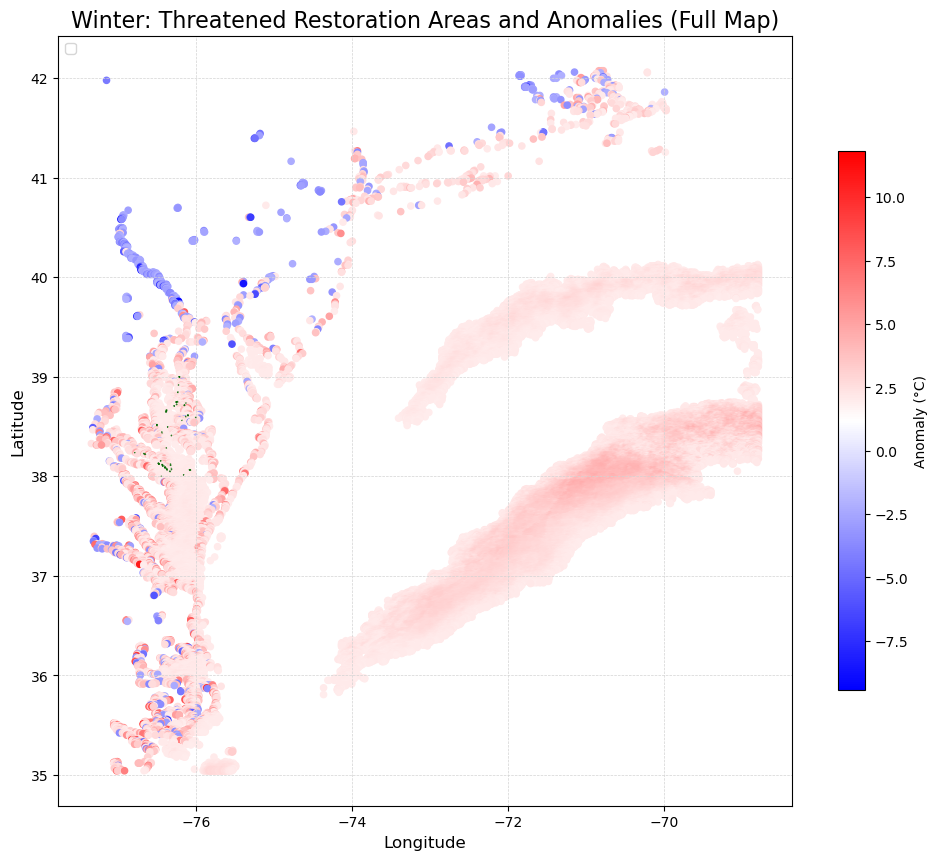

In [14]:

# 读取 restoration_areas 文件
restoration_areas = gpd.read_file("/Users/lijinpeng/Desktop/MDoyster/data/Restoration/Maryland_Shellfish_-_Historic_Oyster_Plantings.geojson")

# 读取冬季异常值 GeoJSON 文件
winter_anomaly_file = "/Users/lijinpeng/Desktop/MDoyster/data/Climate/geojson_output/Winter_anomalies.geojson"
winter_anomalies = gpd.read_file(winter_anomaly_file)

# 转换为 GeoDataFrame
winter_anomalies_gdf = gpd.GeoDataFrame(
    winter_anomalies,
    geometry=gpd.points_from_xy(winter_anomalies["geometry"].x, winter_anomalies["geometry"].y),
    crs="EPSG:4326"
)

# 过滤冬季异常值：保留 anomaly 值在 [-2, 2] 之外的点
winter_anomalies_filtered = winter_anomalies_gdf[
    (winter_anomalies_gdf["anomaly"] < -2) | (winter_anomalies_gdf["anomaly"] > 2)
]

# 检查哪些 restoration_areas 落在这些异常值点范围内
winter_restoration_intersects = restoration_areas[
    restoration_areas.intersects(winter_anomalies_filtered.unary_union)
]

# 可视化
fig, ax = plt.subplots(figsize=(12, 10))

# 绘制异常值点，使用渐变色表示 anomaly 值
# 定义颜色映射：蓝色（负）到红色（正）
cmap = mcolors.LinearSegmentedColormap.from_list("anomaly_cmap", ["blue", "white", "red"])
norm = mcolors.Normalize(vmin=winter_anomalies_filtered["anomaly"].min(), vmax=winter_anomalies_filtered["anomaly"].max())

# 绘制点，并用颜色表示 anomaly 值
winter_anomalies_filtered.plot(
    ax=ax,
    column="anomaly",
    cmap=cmap,
    norm=norm,
    markersize=20,  # 点的大小
    legend=True,
    legend_kwds={"shrink": 0.7, "label": "Anomaly (°C)"}  # 调整图例比例
)

# 绘制受威胁的 restoration areas，用绿色表示，确保在最后绘制
winter_restoration_intersects.plot(ax=ax, color="#00FF00", edgecolor="darkgreen", alpha=0.8, label="Threatened Areas")

# 添加图例和标题
plt.legend(loc="upper left", fontsize=10)
plt.title("Winter: Threatened Restoration Areas and Anomalies (Full Map)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.show()
